# Стартиране на сървърът

За да се започне работа трябва малко подготовка.

1. Arduino то трябва да се включи в usb-то на компютъра.
2. Трябва по някакъв начин да се активира анакондата в директорията, където са копирани тези скриптове. Идеята е да може да се стартира питона.
3. от промпт се въвежда: „python ./krystioMagServer.py“ (без кавички)
4. след стартиране на скрипта krystioMagServer.py
На екрана се изписва нещо от сорта: <b>
                                   
    
    ---“ списък със свързаните сериини ресурси <b>
    
 None   /dev/ttyS0                  
 Arduino (www.arduino.cc)   /dev/ttyACM0
    
    ---“ част от hello<b>
    
 Connecting b'Krastio Magnet\r\n' serial interface 
    
    ---“ производител на ардуинотоo<b>
    
 Made by 'Arduino (www.arduino.cc)'
    
     ---“ на кой порт<b>
    
 on port /dev/ttyACM0
    
    ---“ скорост на връзкаo<b>
    
 With baudrate 115200 ...  
    
    ---“ IP adressa на компютъра: порт връзкаo<b> 
    
 ... To IP address    
     
 192.168.1.106:4242
    
    ---“ на кой порт е свързано, в win com1,2,..???o<b>
    
 Connected on port /dev/ttyACM0                     

Прозореца зависва и може да бъде прекъснат с натискане на ctl-C комбинация от бутони

5. Докато прозореца е отворен сървърът работи




## Стартиране на клиент

In [4]:
import zerorpc 
cnt = zerorpc.Client()

#cnt.connect("tcp://192.168.1.106:4242")
cnt.connect("tcp://192.168.1.109:4242")  # Ако клиента и сървърът са на различни компютри ip-то изписано от сървъра
#cnt.connect("tcp://127.0.0.1:4242")       # 127.0.0.1 означва същият компютър
                                          #---ако горното е изпълнено без грешки ...
                                          #---след стартиране на сървърът диода мига 4 пъти
cnt.mode(1)                               # след тази команда започва да мига 2 пъти

#cnt.calibfromee()

1

In [5]:
                         #Ако машинката е жива може да се прочете hello comandata
                         #няма особен смисъл...
cnt.hello()

['megaatmega2560', 'Krastio Magnet']

## Най-главното

In [6]:
cnt.read(0)              # стойност във миливолти на канал 0

1311

In [7]:
cnt.read(1)              # стойност във миливолти на канал 1 ...

1237

### Край! Това беше всичко ...







## Как се прави динамична графика

<IPython.core.display.Javascript object>


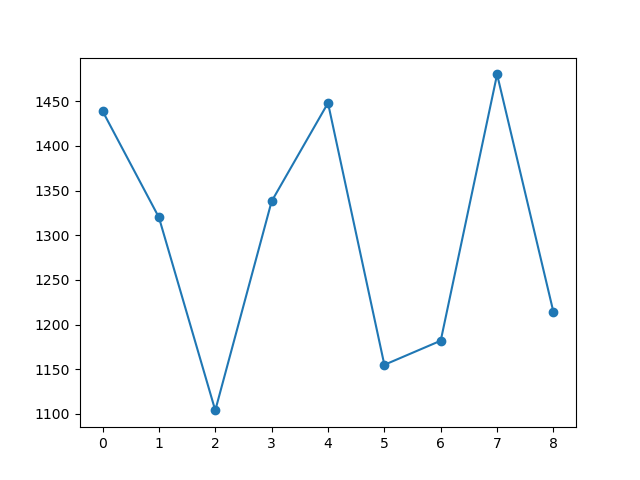

In [6]:
import time
import string
from itertools import count

%matplotlib inline
import matplotlib as mplt 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook


x = []
y = []
index = count()

step = 0
step_size = 1   # increment for increasing step
n_show = 20     # number of points to keep and show


def animate(i):  
    tmp = cnt.read(0)
    x.append(i)
    y.append(tmp)
    if len(x) > n_show:
        x.pop(0)
        y.pop(0)
    
    plt.cla()     
    plt.plot(y, marker="o")


ani = FuncAnimation(plt.gcf(), animate, interval = step_size*1000, cache_frame_data=False)


In [8]:
cnt.vref(1) # Raboti и по време на работа на графиката. Скокът е заради смяна на обхвата

1

In [9]:
cnt.hello()  # Raboti и по време на работа на графиката. Скокът е заради смяна на обхвата

['megaatmega2560', 'Krastio Magnet']

## Има и още. Още доста...

In [39]:
cnt.read(0)            #Например командата дава резултат в миливолти.

1121

In [40]:
cnt.read(0,'volts')    # Но може миливолтите да се трансформират 
                       # от калибровъчен полином. Но за това малко по-късно ...

1.121

In [12]:
cnt.read(calib = 'volts', raw = True)   # !!!! Не работи!!! заради сървърът

[1121, 1121, 1121, 1121]

In [42]:
cnt.read(0,'equ',True)  # !!!тредават се аргументи само позиционно, полинов equ e за еквивалентност. 

1023

In [43]:
cnt.read(0,'equ')     #raw e Fase po difalt

1121

In [44]:
# за сурово четене, по-добре е да се използва примитива:

cnt.ur(0)    

[1, 0]

## Малко общи приказки, трябва да се научат някога. Става дума за следните калибровки:

### 1.Напрежения на ADC-to На Arduinoto

В ардуиното се пресмята напрежението в миливолти, от битовете и опорните напрежения на ADC-to. Към ADC-to могат да се вкючат три референса: 0,1,2 , който имат опорни напрежения, съответно, околу 5V, 1.1V и 2.5V. Системата позволява всеки канал да се мери към различен реферес, но не се препоръчва. 

Нампреженията на референсите, могат да се въвведат от външната система, да се запишат в постоянната памет на прожесора 

### 2.Калибровачни полиноми в паметта на сървъра

След като сървъра получи резултат от ардуиното, може,  ако е въведено име на полином, да върне на заявителя, напрежението от ардуиното в миливолти, пресметнато през каличбовачният полином... Полиноми могат да се въведат от клиента на сървъра, и да се запишат във файл в директорията на скрипта на сървъра.

## Работа с опорните напрежения

In [20]:
cnt.vref()                # Връща в момента спрямо какъв референ се мерят 4 канали
                          # 0 означава около 5V, 1 е референс 1.1V и 2 е 2.5V
                          # Винаги в началото 0

[1, 1, 1, 1]

In [8]:
cnt.vref(1)              # Определя се референс 1, което е околу 1.1V, за всички канали

1

In [9]:
cnt.vref(2,2)            # Сетва се канал 2 да е с референсе 2, което е околу 2.5V

2

In [11]:
cnt.vref(0)              # Пак всичко е 5 волта

0

In [12]:
cnt.vref()               # За да гледаме горното ...

[0, 0, 0, 0]

In [13]:
cnt.setvref()            # Стойновти във миливолти на трите референса

[4691, 1121, 2513]

In [18]:
cnt.setvref(0,4692 )     #Setni na 0 референс(напрежение захрнването) на 4691 миливолта

4692

In [19]:
cnt.calibtoee()          #Записва стойностите на калибровката на референсите в постоянната памен на процесор 

In [9]:
cnt.calibfromee()        #Възтановяна калибровката от постоянната памет на процесора

In [10]:
cnt.setvref()            #Проверка

[4690, 1121, 2513]

## Работа с полиноми

In [48]:
cnt.polynoms_list()               #наличните полъноми в момента:
                                  # коефицент пред най-високата степен ... до коефицент пред нулева степен. 

'equ:[1, 0] , volts:[0.001, 0] , '

In [49]:

cnt.add_polynom("zerro", [0])  #set a new polynom 
#cnt.polynoms_to_file() # The filename is defined in the server
#cnt.polynoms_to_file()

In [53]:
cnt.read(0,'volts') 

1.055

In [54]:
#обаче 
cnt.read(0,'zerro') 


0

## Още команди

In [22]:
cnt.uv()                 # Прочети напрежение в миливолти дублира 

[1132, 1119, 1128, 1178]

In [23]:
nomer_na_kanal = 0
cnt.uv(nomer_na_kanal)   # Прочети напрежение във волти на nomer_na_kanal канал

1132

In [24]:
cnt.ur()                 # Папрежението в битове на ацп-то [[референс, битове][1-канал][2 канал][3 канал]]
                         # Това се използва за калибриране на стойностите на опорните напрежения vref

[[0, 246], [0, 250], [0, 257], [0, 250]]

In [ ]:
cnt.ur(nomer_na_kanal)   # Само на един канал 

## Kak се калибрират опорните напрежения ...



In [98]:
from time import sleep
from statistics import mean 
ext_voltmeter = []
raw_ref_0 = [] 
raw_ref_1 = []
raw_ref_2 = []

def long_mesurment():
    sleep(1)
    tmp = []
    for i in range(10):
        tmp.append(cnt.ur(0)[1])
        sleep(1)
        
    return(mean(tmp))

    

In [124]:
ext_voltmeter.append(3320)
cnt.vref(0)
raw_ref_0.append(long_mesurment())
#cnt.vref(1)
#raw_ref_1.append(long_mesurment())
#cnt.vref(2)
#raw_ref_2.append(long_mesurment())


In [125]:
print(ext_voltmeter)
print(raw_ref_0)
#print(raw_ref_1)
#print(raw_ref_2)

[0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450, 2860, 3040, 3300, 3320]
[0, 12, 52, 122, 212.5, 309.1, 406.6, 455, 497.6, 510.7, 596.3, 633.8, 690.8, 694]


In [127]:
#obhwat 1
uvx1 = [0, 73, 264, 597, 1031]
adcu1 = [0, 62.9, 243.8, 560, 970.7]

#obhwat2
uvx2 = [0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450]
adcu2 =[0, 25, 102, 236.2, 410.5, 595.8, 783.2, 875.8, 957.1, 981.9]

#obhvat0
uvx0 = [0, 73, 264, 597, 1031, 1492, 1958, 2180, 2390, 2450, 2860, 3040, 3300, 3320]
adcu0=[0, 12, 52, 122, 212.5, 309.1, 406.6, 455, 497.6, 510.7, 596.3, 633.8, 690.8, 694]

In [128]:
import numpy as np

In [137]:
a = np.array(adcu0)
b = np.array(uvx0)

coef = np.polyfit(a, b,1)
vref0 = list(coef)[0]*1023

a = np.array(adcu1)
b = np.array(uvx1)

coef = np.polyfit(a, b,1)
vref1 = list(coef)[0]*1023

a = np.array(adcu2)
b = np.array(uvx2)

coef = np.polyfit(a, b,1)
vref2 = list(coef)[0]*1023

print(vref0)
print(vref1)
print(vref2)


4879.444899464198
1083.2364761110668
2544.533574573781


In [11]:
vref0 = 4879
vref1 = 1083
vref2 = 2544

In [12]:
cnt.setvref(0, vref0)
cnt.setvref(1, vref1)
cnt.setvref(2, vref2)

2544

In [13]:
cnt.setvref()

[4879, 1083, 2544]

In [14]:
cnt.calibtoee()

## Пример Как става калибровката за токовият сензор ...

In [57]:
import numpy as np

In [59]:
ampers = np.array([0, 0.5, 1, 1.5, 2, 2.5, 2.97])          #измерени данни от младежа и мен      
ardmilivolts = np.array([2468, 2417, 2365, 2316, 2264, 2213, 2164 ])

In [84]:
polynom_coeficents = np.polyfit(ardmilivolts ,ampers, 1)
fitpolynom = np.poly1d( polynom_coeficents)
x = np.linspace(2200,2450, 10)
y = fitpolynom(x)

<IPython.core.display.Javascript object>


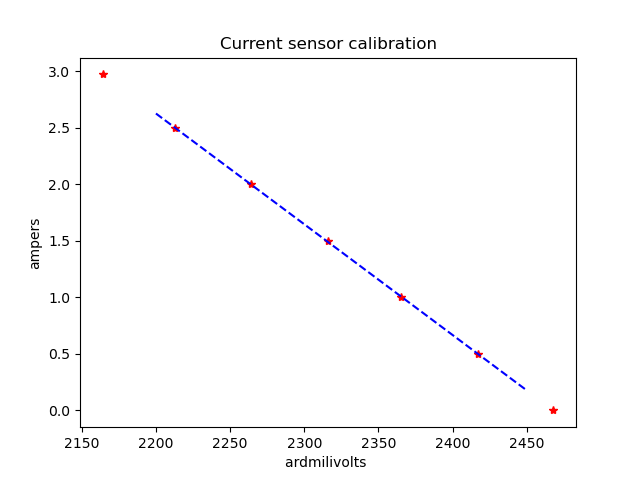

Text(0, 0.5, 'ampers')

In [85]:
fig2, ax2 = plt.subplots()
ax2.plot(ardmilivolts, ampers, 'r*')
ax2.plot(x, y, '--b')
ax2.set_title("Current sensor calibration" )
ax2.set_xlabel("ardmilivolts ")
ax2.set_ylabel("ampers")

In [76]:
print(list(polynom_coeficents))
cnt.add_polynom('ampers',list(polynom_coeficents))

[-0.009788782891869855, 24.159543475504957]


In [77]:
cnt.polynoms_list()

'equ:[1, 0] , volts:[0.001, 0] , zerro:[0] , ampers:[-0.009788782891869855, 24.159543475504957] , '

In [78]:
cnt.read(0, 'ampers')

13.83237752458226

In [145]:
cnt.polynoms_to_file("polynoms121124.json")

"\n# Importing necessary libraries\n    import numpy as np\n    import matplotlib.pyplot as mp\n\n    # Setting our seed as 12\n    np.random.seed(12)\n    # X-Coordinates\n    x = np.linspace( 0, 1, 25 )\n\n    # Polynomial equation\n    y = np.cos(x) + 0.3*np.random.rand(25)\n    # Using polyfit func with 4 degrees\n    p = np.poly1d( np.polyfit(x, y, 4) )\n    t = np.linspace(0, 1, 250)\n\n    # Plotting our polynomial function\n    mp.plot(x, y, 'o', t, p(t), '-')\n    mp.show()\n"